In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


# Clustering cleints' data using k-means .
#  Elbow  vs Silhouette method
### I will write a simple k-means code that aims at clustering the clients given their income and spending score
#### Objective : I am writing this script to learn ,unsupervised machine learning, by practice

In [2]:
import sklearn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from yellowbrick.cluster import SilhouetteVisualizer  

In [3]:
client_dataset = pd.read_csv('Mall_Customers.csv')  

client_dataset is a pd DataFrame

In [4]:

print(client_dataset.shape)
client_dataset.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
client_dataset.isnull().sum()   #checking

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We dont have missing values.
#### We are interested in Annual Income and Spending Score


In [6]:
X= client_dataset.iloc[:,[3,4]]  #extract the 4th and 5th col
print(X)
X.shape
feature_names = list(X.columns)


     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


## Let's choose the number of clusters:

In [7]:
wcss = []
for i in range (1,21): #20 values of wcss
    kmeans = KMeans( n_clusters = i , init  = 'k-means++',n_init =20,random_state = 3)
    #toujours choisir k-means++ 
    #consiste a espacer les variables aleatoires 
    #random_state equivalent a seed
    #KMeans is used to compute the converged centroids ( best centroid)
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia computes wcss - also called within cluster variance
    

 

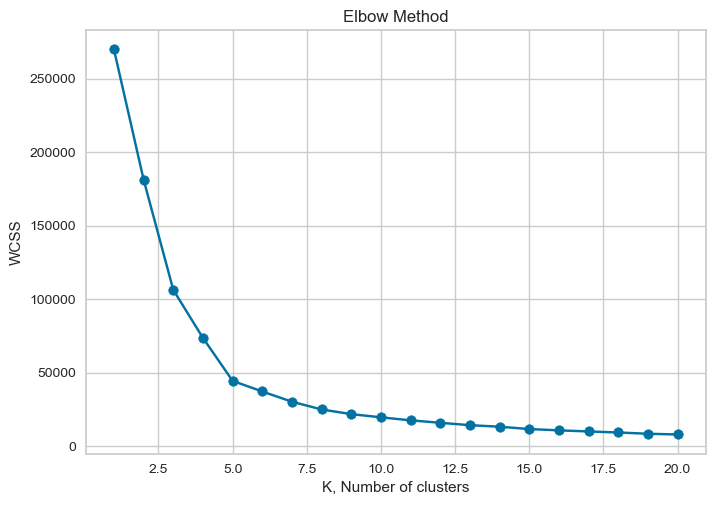

In [8]:
plt.plot(range(1,21),wcss)
plt.scatter(range(1,21),wcss , marker='o')
plt.title("Elbow Method")
plt.xlabel("K, Number of clusters")
plt.ylabel("WCSS")
plt.savefig('elbow_method_graph.png')
plt.show()


#### Looking at the graph:Ebow point is at k = 5 




In [11]:
kmeans  = KMeans(n_clusters = 5,n_init=10, init = "k-means++" , random_state = 0) 
kmeans.fit(X)
Y = kmeans.labels_   
print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Let's plot the clusters and their centroids

In [12]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
list_cluster = [cluster1,cluster2,cluster3,cluster4,cluster5]

for i in range(len(Y)):
    list_cluster[Y[i]].append(i)
    #This will add the index of each point to the corresponding cluster
''' #see here
for i in list_cluster:
    print(i)
    print("\n")
'''


' #see here\nfor i in list_cluster:\n    print(i)\n    print("\n")\n'

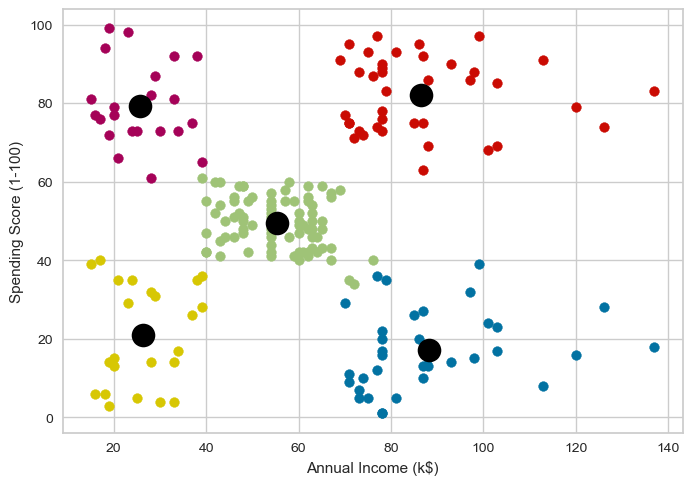

In [13]:
#AMELIORE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#A REFAIREE!!!!!!!!!!!!!!!111111111
x_coords1 = [X.iloc[i]["Annual Income (k$)"] for i in cluster1]
x_coords2 = [X.iloc[i]["Annual Income (k$)"] for i in cluster2]
x_coords3 = [X.iloc[i]["Annual Income (k$)"] for i in cluster3]
x_coords4 = [X.iloc[i]["Annual Income (k$)"] for i in cluster4]
x_coords5 = [X.iloc[i]["Annual Income (k$)"] for i in cluster5]
y_coords1 = [X.iloc[i]["Spending Score (1-100)"] for i in cluster1]
y_coords2 = [X.iloc[i]["Spending Score (1-100)"] for i in cluster2]
y_coords3 = [X.iloc[i]["Spending Score (1-100)"] for i in cluster3]
y_coords4 = [X.iloc[i]["Spending Score (1-100)"] for i in cluster4]
y_coords5 = [X.iloc[i]["Spending Score (1-100)"] for i in cluster5]

plt.scatter(x_coords1, y_coords1)
plt.scatter(x_coords2, y_coords2)
plt.scatter(x_coords3, y_coords3)
plt.scatter(x_coords4, y_coords4)
plt.scatter(x_coords5, y_coords5)


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='o',color='black',linewidth=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.savefig('Clustered_data.png')

plt.show()


In [14]:
''' 
#plus court
kmeans = KMeans(n_clusters=5, n_init=10, init="k-means++", random_state=0)
kmeans.fit(X)
Y = kmeans.labels_

clusters = [[] for _ in range(5)]
for i, label in enumerate(Y):
    clusters[label].append(i)

x_coords = [[X.iloc[i]["Annual Income (k$)"] for i in cluster] for cluster in clusters]
y_coords = [[X.iloc[i]["Spending Score (1-100)"] for i in cluster] for cluster in clusters]

'''





' \n#plus court\nkmeans = KMeans(n_clusters=5, n_init=10, init="k-means++", random_state=0)\nkmeans.fit(X)\nY = kmeans.labels_\n\nclusters = [[] for _ in range(5)]\nfor i, label in enumerate(Y):\n    clusters[label].append(i)\n\nx_coords = [[X.iloc[i]["Annual Income (k$)"] for i in cluster] for cluster in clusters]\ny_coords = [[X.iloc[i]["Spending Score (1-100)"] for i in cluster] for cluster in clusters]\n\n'

##### Now that our model is trained , we can see that clients can be clustered into 5 groups.we can use the result to build a business strategy by developing a marketing strategy for each customer segment. For example, for the high spenders with low incomes, the marketing strategy can focus on offering discounts or promotions to increase their purchase frequency, while for the low spenders with high incomes, the strategy can focus on offering high-quality products to increase their spending.


# Silhouette method

##### The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
##### Computing Silhoutte Coefficient:
##### Steps to find the silhouette coefficient of an i’th point:
##### Compute a(i): The average distance of that point with all other points in the same clusters.
##### Compute b(i): The average distance of that point with all the points in the closest cluster to its cluster.
##### Compute s(i) — silhouette coefficient or i’th point using below mentioned formula.
##### s(i) = (b(i) - a(i)) / max(a(i), b(i)).
##### After computing the silhouette coefficient for each point, average it out to get the silhouette score.

###### https://www.youtube.com/watch?v=_jg1UFoef1c
###### In order to use the silhouette method in k means : I can use the KMeans() function in python for different values of k ( for different number of clusters ) . In order to know which model is best ( i.e. how many clusters k do I want in order for the model to be effective ) I must compute the silhouette coefficient of each point for each model (we do this after the model is stable ) and average the silhouette coefficients . I will finally compare the average silhouette coefficient for each model and choose the highest .

# Let's start


After generating a silhouette visualizer for different values of k, you should look for the following features to determine which k is the most efficient for your clustering analysis:

1- High average silhouette score: Look for the chart with the highest average silhouette score across all values of k. This indicates that the clustering algorithm is performing well for that particular value of k.

2- Balanced cluster sizes: Look for charts where the thickness of each color-coded bar is relatively uniform across all clusters. This indicates that the clustering algorithm has produced clusters with similar numbers of data points. Unbalanced cluster sizes may indicate that the clustering algorithm is not working well for a particular value of k.

3- Clear separation between clusters: Look for charts where the color-coded bars for each cluster are distinctly separated from the bars of other clusters. This indicates that the clustering algorithm has produced distinct, non-overlapping clusters.


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with featu

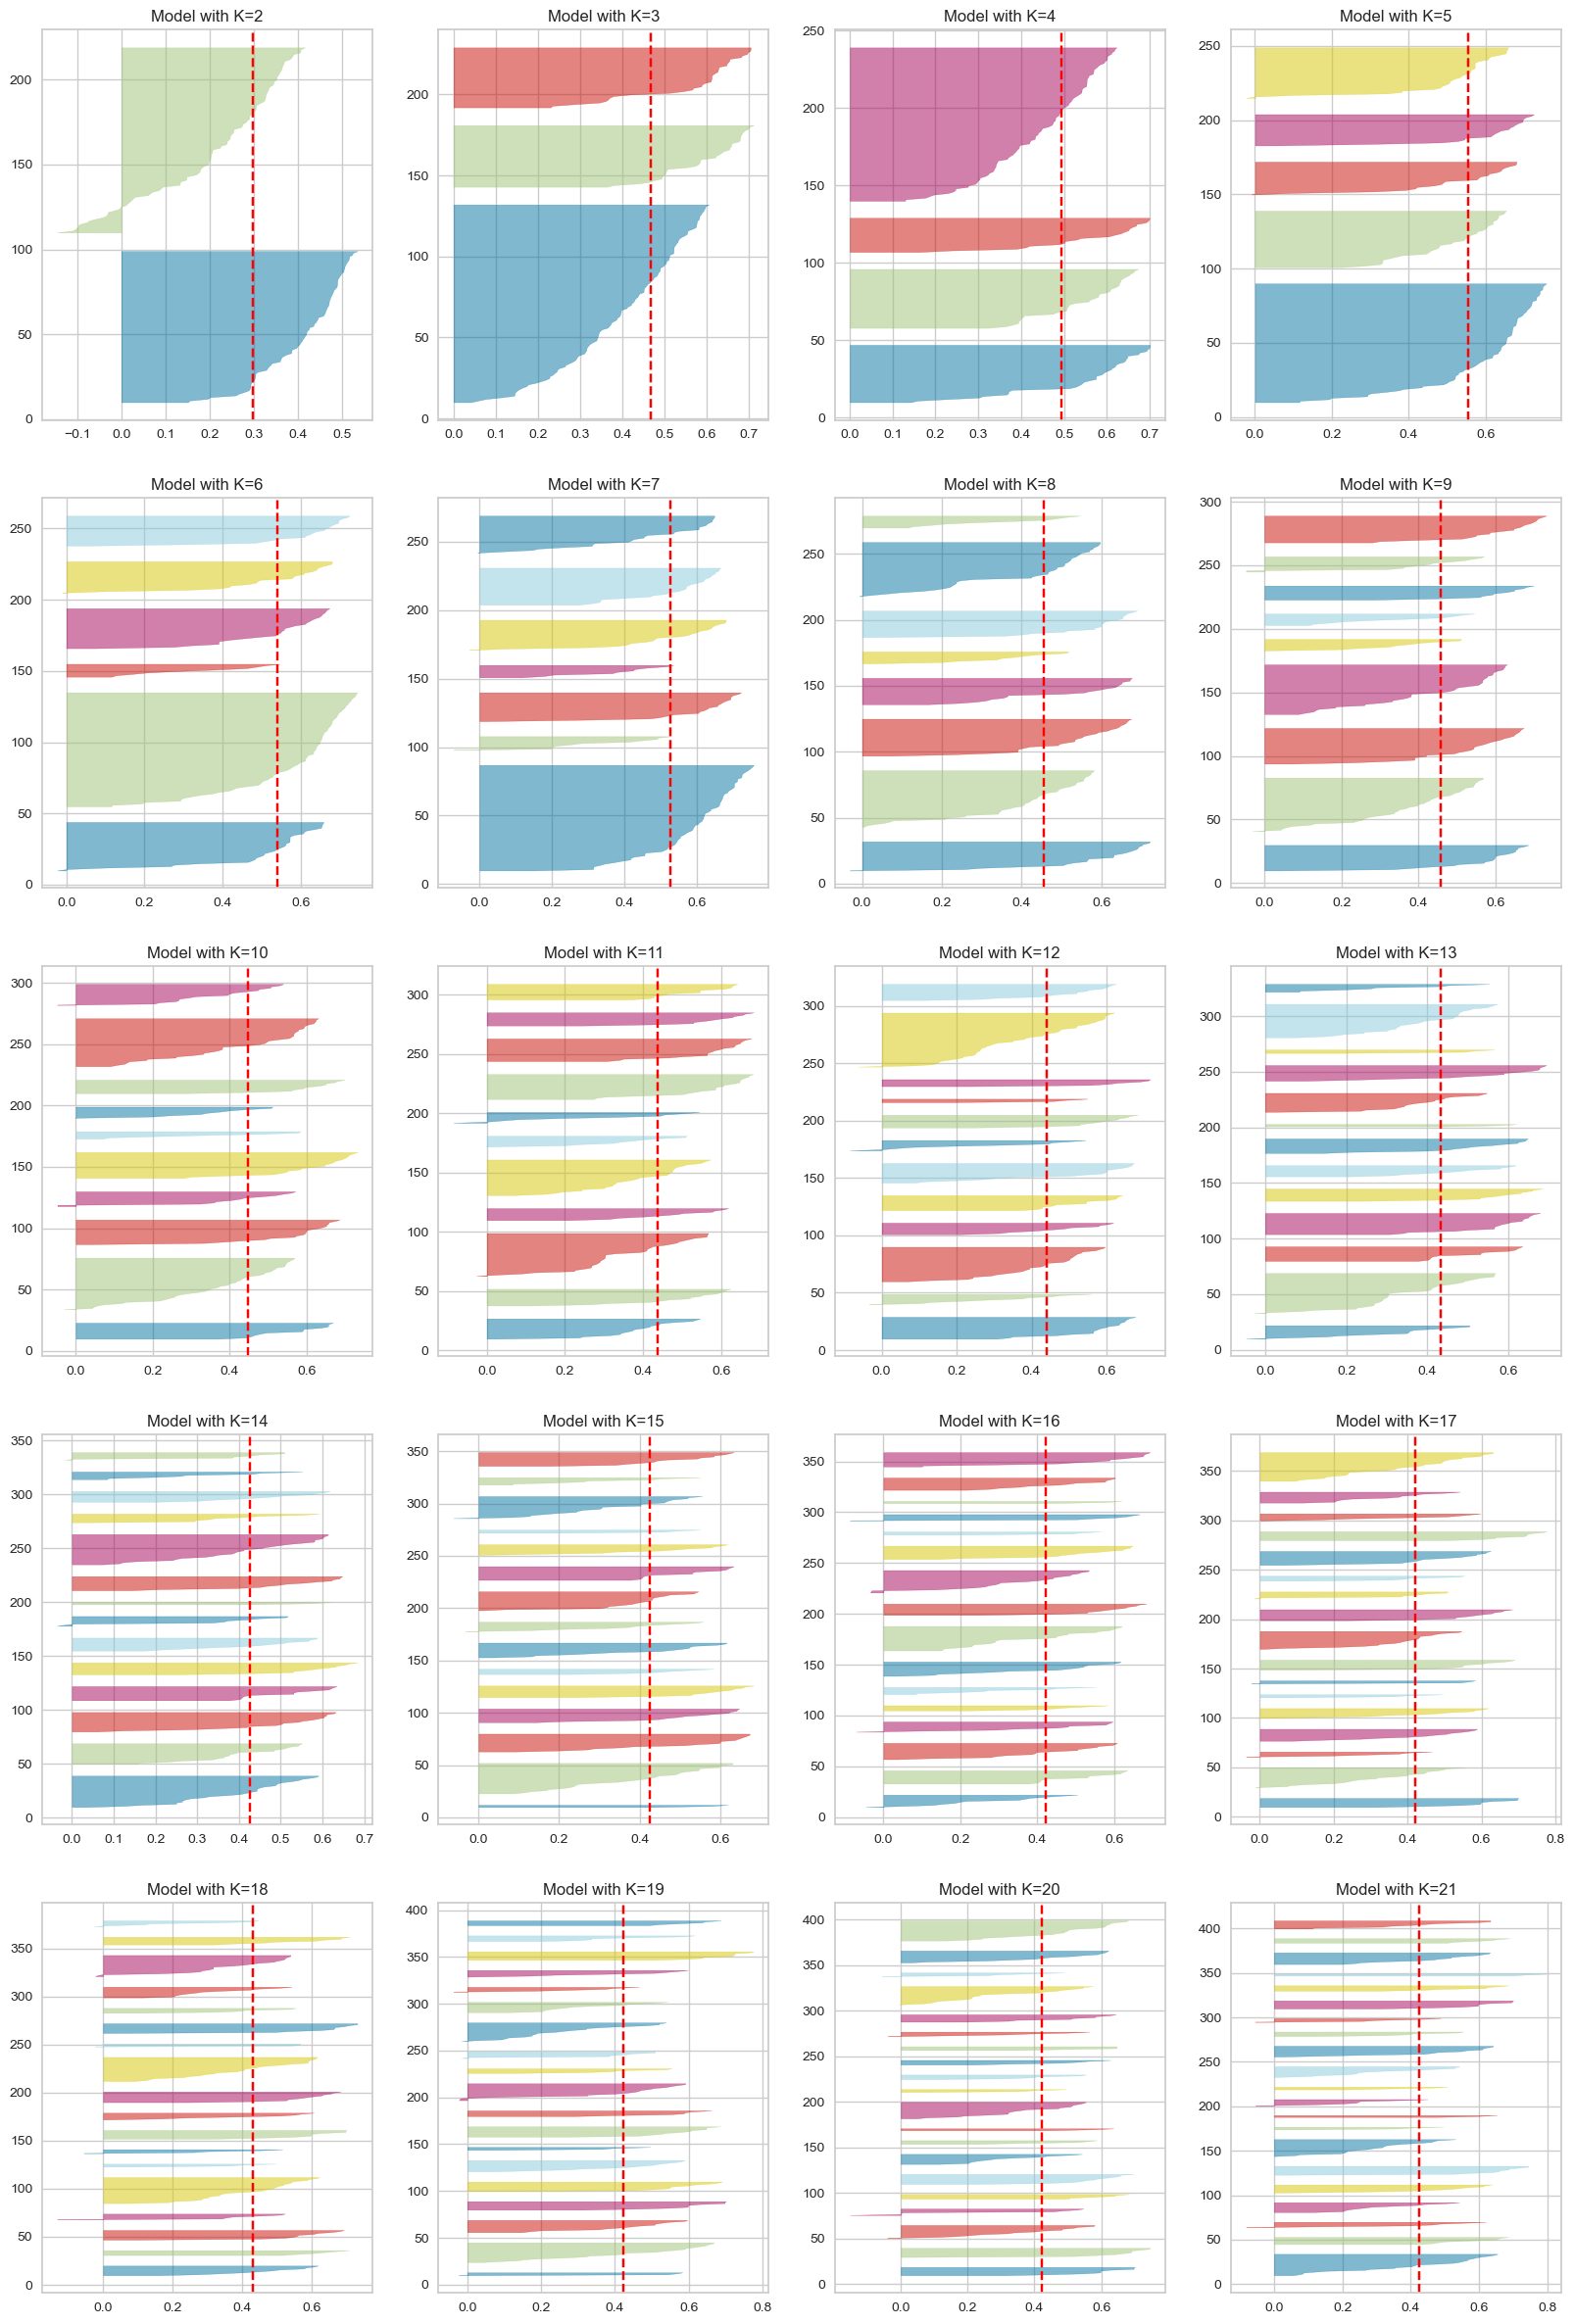

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))
X
for i in range(2, 22):   #silhouette ne fonctionne pas pour 1 cluster ( logique : slhouette mesure la distance entre les clusters, l nous faut au moin 2 cluster pour utiliser cette methode )
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20, random_state=3)
    kmeans.fit(X)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[(i-2)//4, (i-2)%4], feature_names=None) # feature_names=None : BECAUSE I GOT A WARNING MESSAGE DUE TO THE NAME 
    ax[(i-2)//4, (i-2)%4].set_title('Model with K='+str(i))
    visualizer.fit(X)
    
plt.show()


### K=5 IS THE MODEL WITH THE HIGHEST COEFFICIENT ( AND HAS THE BEST FITTING PLOT) 